# Group 6 Mini-Project: Popular Spotify Songs

In [31]:
import numpy as np
import pandas as pd
import seaborn as sb
import plotly.express as px 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

***

## 1: Import Data

In [32]:
data_raw = pd.read_csv('Popular_Spotify_Songs.csv', encoding='latin1')
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

***

## 2: Data Cleaning & Preparation

#### Remove non-numeric 'streams' values

In [33]:
data_raw['streams'] = pd.to_numeric(data_raw['streams'], errors="coerce", downcast='integer')
data_raw.dropna(subset=['streams'], inplace=True)
data_raw

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


#### Remove duplicates, sort in ascending order based on 'streams'

In [34]:
data = data_raw.drop_duplicates('track_name').sort_values('streams')
data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
123,Que Vuelvas,"Carin Leon, Grupo Frontera",2,2022,12,9,763,26,2.762000e+03,21,...,162,A#,Major,49,78,64,19,0,11,4
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,2022,12,22,138,4,1.365184e+06,13,...,105,G,Major,82,62,74,10,0,33,7
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,2023,7,13,437,31,1.159939e+07,17,...,97,NaN,Major,79,92,89,5,0,6,5
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,1.195664e+07,5,...,133,B,Minor,93,68,65,42,0,12,25
68,Overdrive,Post Malone,1,2023,7,14,410,36,1.478042e+07,36,...,140,C#,Major,56,48,73,0,0,35,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8


#### Remove Irrelevant Columns

In [35]:
irr_cols = ['artist_count', 'released_day', 'in_apple_playlists', 'in_apple_charts', 
            'in_deezer_charts', 'in_deezer_playlists', 'in_shazam_charts', 'key']  
data.drop(columns=irr_cols, inplace=True)
data.head()

,track_name,artist(s)_name,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
123,Que Vuelvas,"Carin Leon, Grupo Frontera",2022,12,763,26,2762.0,162,Major,49,78,64,19,0,11,4
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",2022,12,138,4,1365184.0,105,Major,82,62,74,10,0,33,7
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",2023,7,437,31,11599388.0,97,Major,79,92,89,5,0,6,5
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2023,6,293,8,11956641.0,133,Minor,93,68,65,42,0,12,25
68,Overdrive,Post Malone,2023,7,410,36,14780425.0,140,Major,56,48,73,0,0,35,4


#### Check for Null Values

In [36]:
for i in data:
    nulls = data[i].isnull().sum()
    print(f"Nulls for {i}: {nulls}")

Nulls for track_name: 0
Nulls for artist(s)_name: 0
Nulls for released_year: 0
Nulls for released_month: 0
Nulls for in_spotify_playlists: 0
Nulls for in_spotify_charts: 0
Nulls for streams: 0
Nulls for bpm: 0
Nulls for mode: 0
Nulls for danceability_%: 0
Nulls for valence_%: 0
Nulls for energy_%: 0
Nulls for acousticness_%: 0
Nulls for instrumentalness_%: 0
Nulls for liveness_%: 0
Nulls for speechiness_%: 0


#### Describe Data

In [37]:
data_raw.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,2.669118,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,6.038152,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,0.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


***
#### <ins> Features:</ins>

**track_name:** *name of the song* 

**artist(s)\_name:** *name of the artist* 

**released_year:** *year the song is released* --> numerical 

**released_month:** *month the song is released* --> categorical

      MONTHS OF A YEAR: 
      1    JAN
      2    FEB
      3    MAR
      ...

**in_spotify_playlists:** *number of spotify playlists the songs are in* --> numerical 

**in_spotify_charts:** *number of spotify charts the songs are in* --> numerical 

**streams:** *number of times the songs are played* --> numerical 

**bpm:** *"beats per minute", tempo of the song* --> numerical 

**mode:** *type of musical scale* --> categorical

      MAJOR
      MINOR

**danceability_%:** *how suitable a track is for dancing* --> percentage 

**valence_%:** *describes the musical positiveness conveyed by a track* --> percentage 

**energy_%:** *perceptual measure of intensity and activity* --> percentage 

**acousticness_%:** *whether the track is acoustic* --> percentage 

**instrumentalness_%:** *percentage of the song that doesn't contain vocals* --> percentage

**liveness_%:** *detects the presence of an audience in the recording* --> percentage

**speechiness_%:** *measures the presence of spoken words* --> percentage

***

## 3: Exploratory Data Analysis

#### <ins>Uni-Variate Analysis (Musical Features)

In [38]:
musical_features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
                   'instrumentalness_%', 'liveness_%', 'speechiness_%']

musical_data = data[musical_features].copy()
musical_data.head()

,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
123,162,49,78,64,19,0,11,4
393,105,82,62,74,10,0,33,7
144,97,79,92,89,5,0,6,5
142,133,93,68,65,42,0,12,25
68,140,56,48,73,0,0,35,4


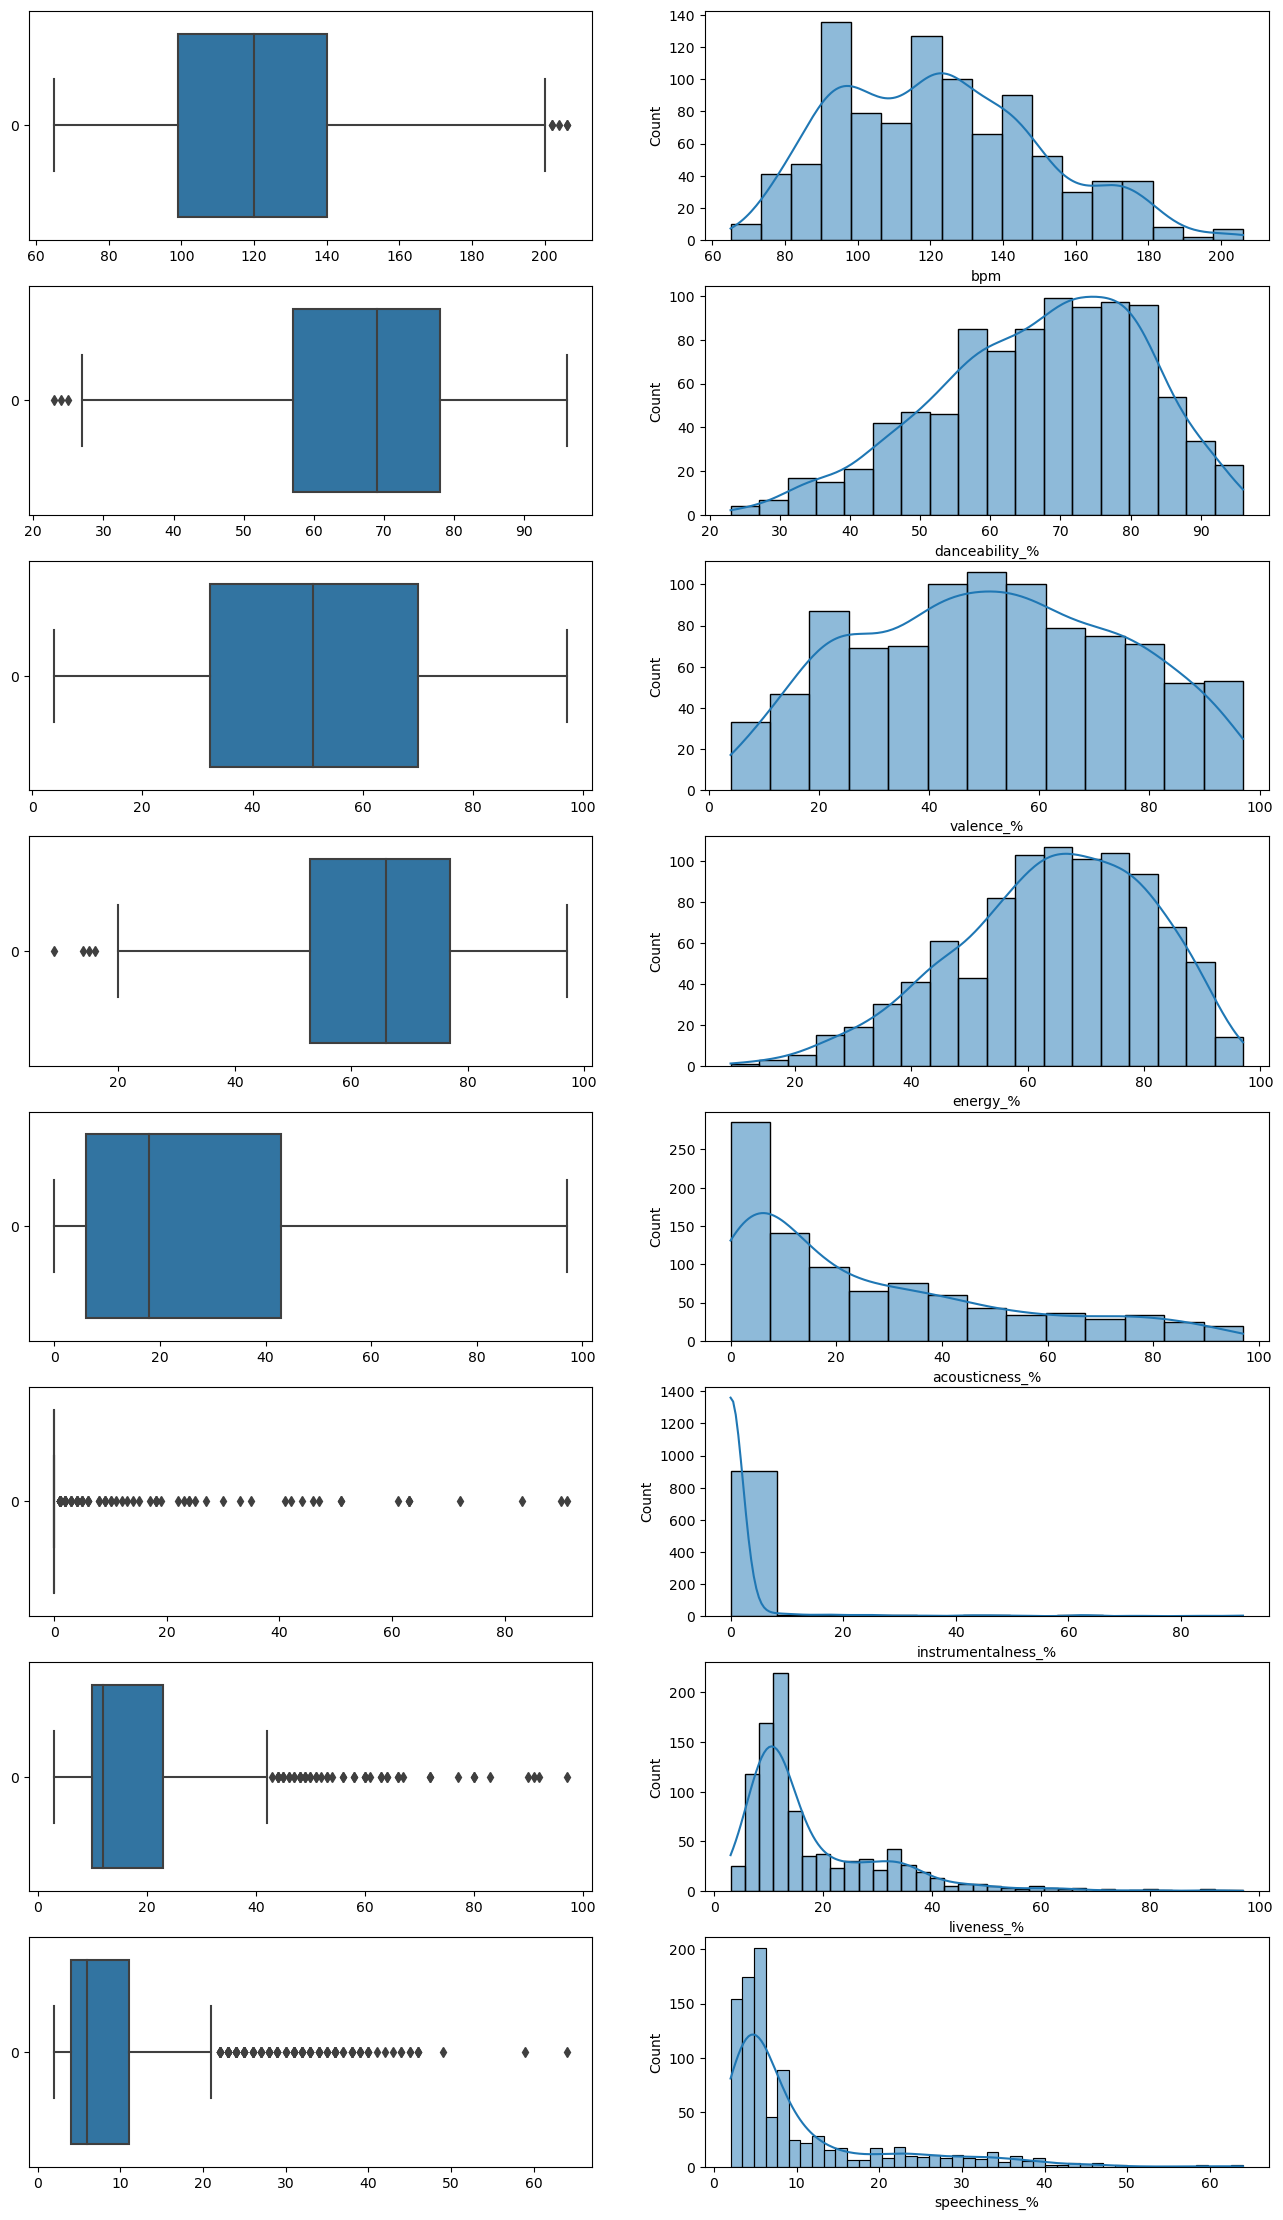

In [39]:
f, axes = plt.subplots(8, 2, figsize=(16, 28))
num = 0
for col in musical_data.columns:
    sb.boxplot(data=musical_data[col], orient='h', ax=axes[num][0])
    sb.histplot(data=musical_data[col], ax=axes[num][1], kde=True)
    num += 1

In [40]:
mode = pd.DataFrame(data['mode']);
mode.head()

,mode
123,Major
393,Major
144,Major
142,Minor
68,Major


/Users/kellietan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


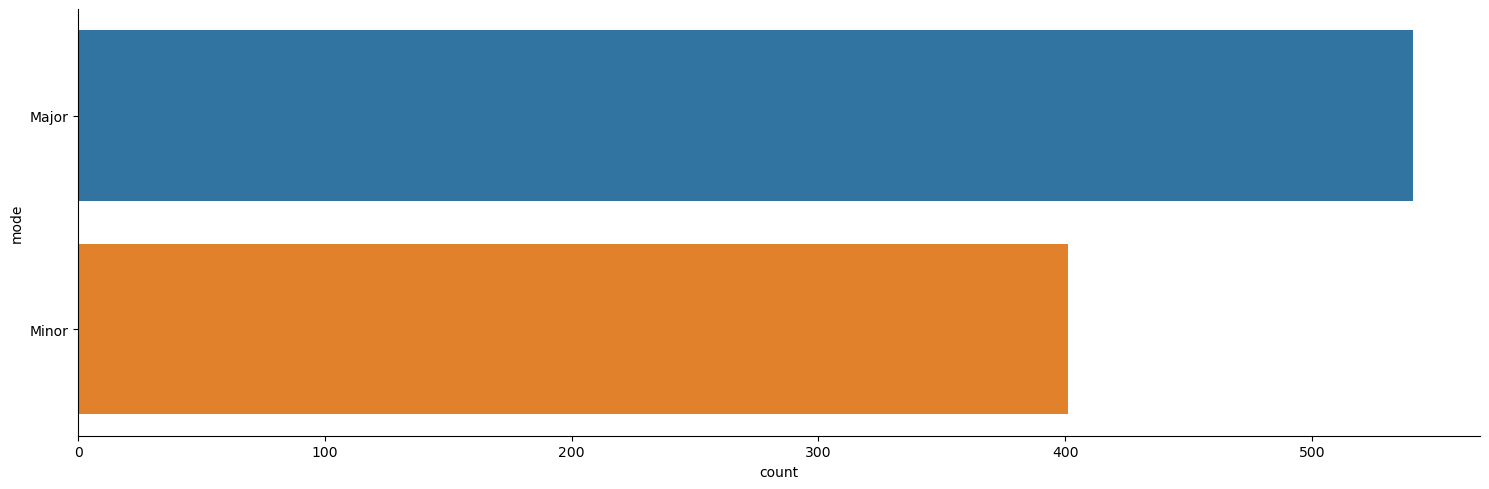

In [41]:
sb.catplot(y='mode', data=mode, kind='count', aspect=3)

#### <ins>Uni-Variate Analysis (Non-Musical Features)

In [42]:
non_musical_features = ['released_year', 'released_month', 'in_spotify_playlists', 'in_spotify_charts']

non_musical_data = data[non_musical_features].copy()
non_musical_data.head()

,released_year,released_month,in_spotify_playlists,in_spotify_charts
123,2022,12,763,26
393,2022,12,138,4
144,2023,7,437,31
142,2023,6,293,8
68,2023,7,410,36


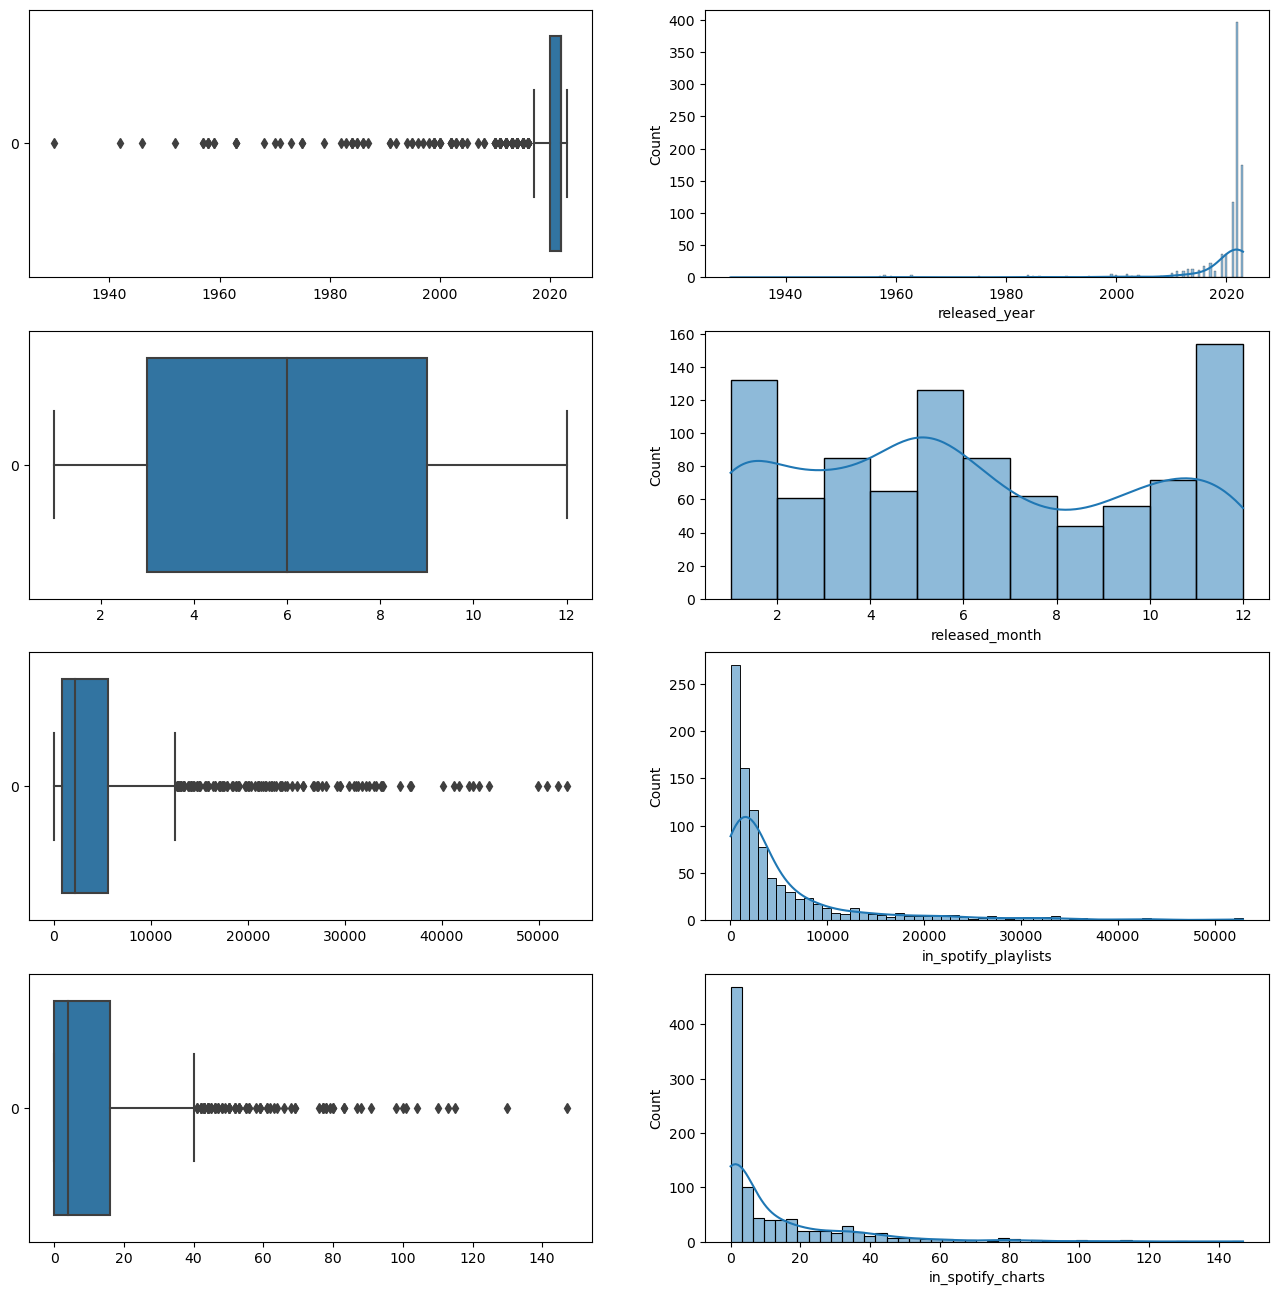

In [43]:
f, axes = plt.subplots(4, 2, figsize=(16, 16))
num = 0
for col in non_musical_data.columns:
    sb.boxplot(data=non_musical_data[col], orient='h', ax=axes[num][0])
    sb.histplot(data=non_musical_data[col], ax=axes[num][1], kde=True)
    num += 1

#### <ins>Pairwise Correlation (Musical & Non-Musical Features)

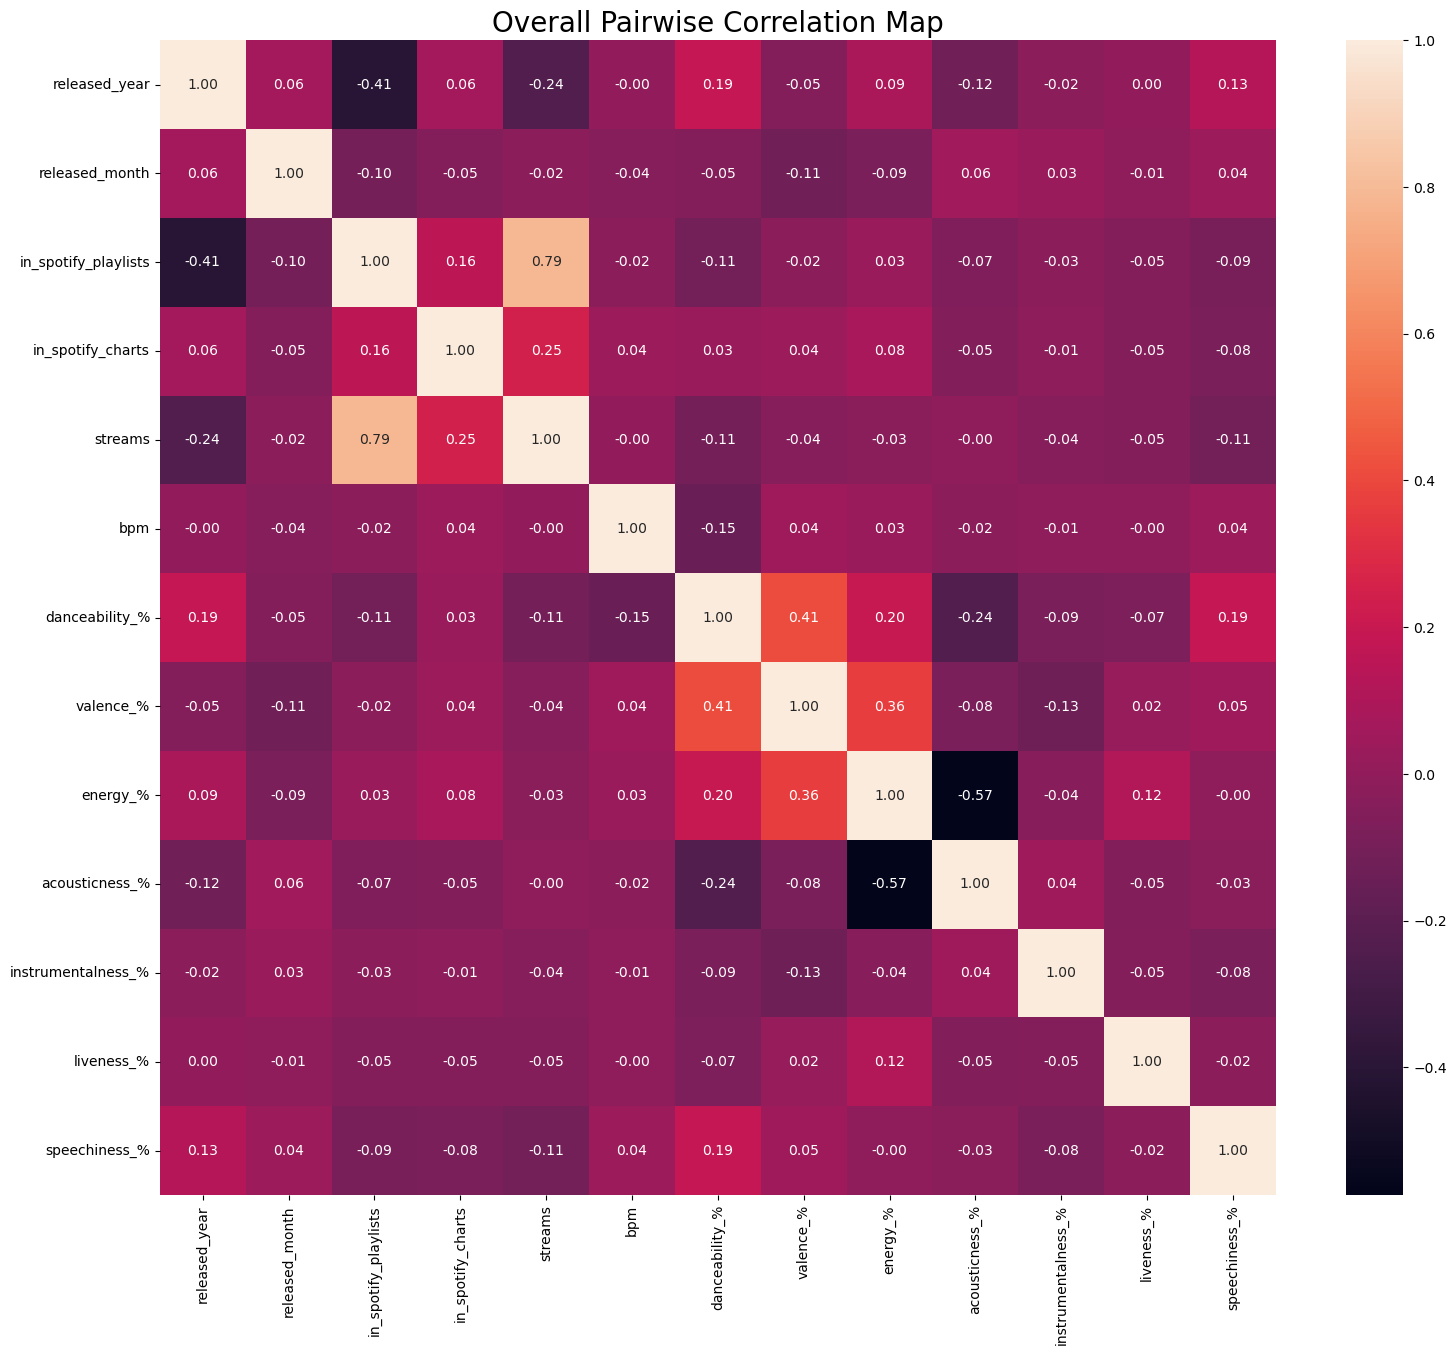

In [44]:
plt.figure(figsize=(18,15))
sb.heatmap(data.corr(numeric_only = True),annot=True,fmt='.2f')
plt.title('Overall Pairwise Correlation Map', size = 20)
plt.show()

#### <ins>Top 20s

#### Top 20 Tracks with Most Streams on Spotify

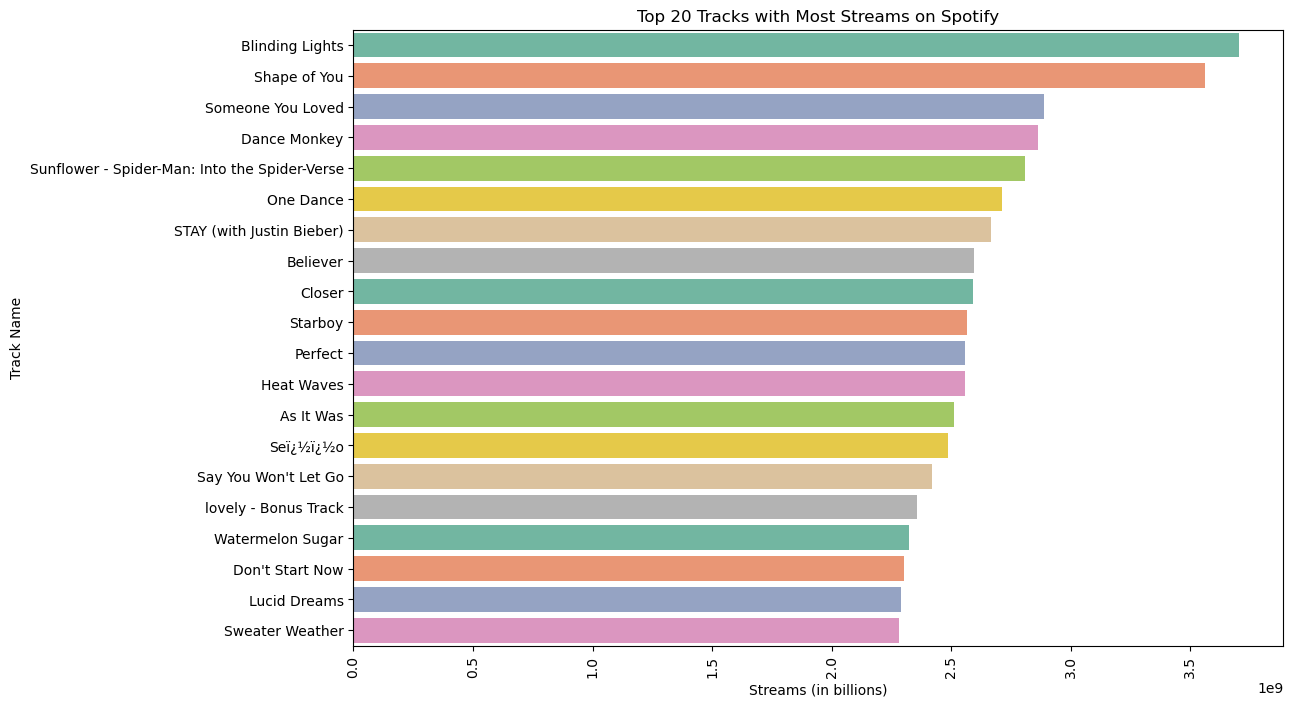

In [45]:
top20_tracks = data[['track_name', 'artist(s)_name','streams']].sort_values(by='streams', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sb.barplot(x=top20_tracks['streams'], y=top20_tracks['track_name'], palette='Set2')
plt.xlabel('Streams (in billions)')
plt.ylabel('Track Name')
plt.title('Top 20 Tracks with Most Streams on Spotify')
plt.xticks(rotation=90)
plt.show()

#### Top 20 Artists with Most Streams on Spotify

In [46]:
top20_artists = data.groupby(["artist(s)_name"]).streams.sum().reset_index().sort_values(by='streams', ascending=False).head(20)
top20_artists

,artist(s)_name,streams
553,Taylor Swift,1.405366e+10
159,Ed Sheeran,1.390895e+10
567,The Weeknd,1.375285e+10
221,Harry Styles,1.131781e+10
43,Bad Bunny,9.997800e+09
427,Olivia Rodrigo,7.442149e+09
170,Eminem,6.183806e+09
75,Bruno Mars,5.846921e+09
25,Arctic Monkeys,5.569807e+09
227,Imagine Dragons,5.272485e+09


#### Top 20 Tracks in Users' Spotify Playlists

In [47]:
top20_in_spotify_playlist = data[['track_name', 'in_spotify_playlists']].sort_values(by='in_spotify_playlists', ascending=False).head(20)
top20_in_spotify_playlist

,track_name,in_spotify_playlists
757,Get Lucky - Radio Edit,52898
630,Mr. Brightside,51979
720,Wake Me Up - Radio Edit,50887
624,Smells Like Teen Spirit - Remastered 2021,49991
199,Take On Me,44927
55,Blinding Lights,43899
162,One Dance,43257
727,Somebody That I Used To Know,42798
114,Everybody Wants To Rule The World,41751
871,Sweet Child O' Mine,41231


#### Top 20 Tracks in Spotify Charts

In [48]:
top20_in_spotify_charts = data[['track_name', 'in_spotify_charts']].sort_values(by='in_spotify_charts', ascending=False).head(20)
top20_in_spotify_charts

,track_name,in_spotify_charts
0,Seven (feat. Latto) (Explicit Ver.),147
14,As It Was,130
12,Flowers,115
2,vampire,113
22,I Wanna Be Yours,110
17,What Was I Made For? [From The Motion Picture ...,104
29,Dance The Night (From Barbie The Album),101
3,Cruel Summer,100
13,Daylight,98
5,Sprinter,91


#### Top 20 Tracks by Top 20 Artists

In [49]:
pd.merge(top20_tracks, top20_artists, on="artist(s)_name", how="inner").rename(columns={"streams_x": "track streams", "streams_y": "artist streams"})

,track_name,artist(s)_name,track streams,artist streams
0,Blinding Lights,The Weeknd,3.703895e+09,1.375285e+10
1,Shape of You,Ed Sheeran,3.562544e+09,1.390895e+10
2,Perfect,Ed Sheeran,2.559529e+09,1.390895e+10
3,Someone You Loved,Lewis Capaldi,2.887242e+09,4.734698e+09
4,Believer,Imagine Dragons,2.594040e+09,5.272485e+09
5,As It Was,Harry Styles,2.513188e+09,1.131781e+10
6,Watermelon Sugar,Harry Styles,2.322580e+09,1.131781e+10
7,Don't Start Now,Dua Lipa,2.303034e+09,3.227639e+09
8,Sweater Weather,The Neighbourhood,2.282771e+09,4.010010e+09


#### Top 20 Tracks (Spotify Playlists) in Overall Top 20 Tracks 

In [50]:
pd.merge(top20_tracks, top20_in_spotify_playlist, on="track_name", how="inner")

,track_name,artist(s)_name,streams,in_spotify_playlists
0,Blinding Lights,The Weeknd,3.703895e+09,43899
1,One Dance,"Drake, WizKid, Kyla",2.713922e+09,43257


***

## 4: Machine Learning: K-Means Clustering

In [51]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.head(5) 

,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
123,2022,12,763,26,2762.0,162,49,78,64,19,0,11,4
393,2022,12,138,4,1365184.0,105,82,62,74,10,0,33,7
144,2023,7,437,31,11599388.0,97,79,92,89,5,0,6,5
142,2023,6,293,8,11956641.0,133,93,68,65,42,0,12,25
68,2023,7,410,36,14780425.0,140,56,48,73,0,0,35,4


In [52]:
sse = [] # Empty list to store the sum of squared distances for each number of clusters

# Fit KMeans model to the data with a range of different numbers of clusters
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(numeric_data)
    sse.append(kmeans.inertia_)  
    # Add the sum of squared distances for the current number of clusters to the list

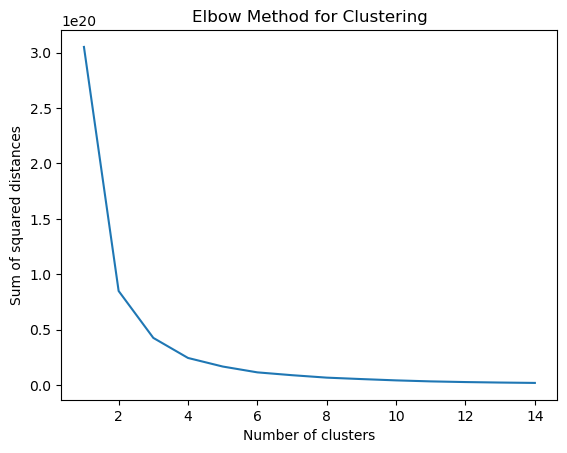

In [53]:
# Plot the sum squared distances for each number of clusters for elbow method

plt.plot(range(1, 15), sse)
plt.title('Elbow Method for Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

In [54]:
kmeans = KMeans(n_clusters=4, random_state=1)

kmeans.fit(numeric_data) # Fit the model to the data

/Users/kellietan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=1)

In [55]:
clusters = kmeans.predict(numeric_data) # Generate cluster assignments for each data point

In [56]:
# Calculate the silhouette score for the generated clusters
silhouette_score(numeric_data, clusters)

0.6403856789309437

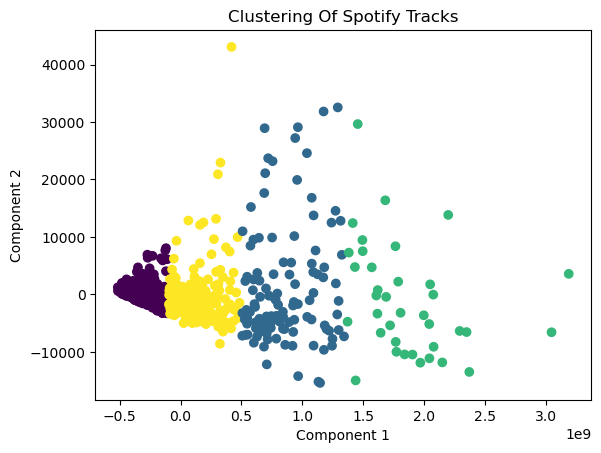

In [57]:
# To visualize the generated clusters, we will first need to reduce the data to two dimensions
# so that we can plot it on a scatter plot

pca = PCA(n_components=2)  # Initialize a PCA model with 2 components
numeric_2d = pca.fit_transform(numeric_data)  # Reduce the data to two dimensions using the PCA model

# Plot the data points on a scatter plot
# Coloring the data points according to their cluster assignment
plt.scatter(numeric_2d[:, 0], numeric_2d[:, 1], c=clusters)
plt.title('Clustering Of Spotify Tracks')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

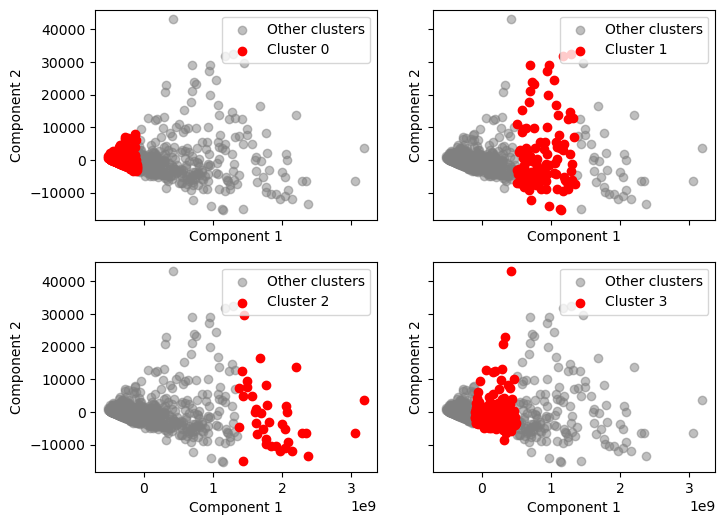

In [58]:
# Get the unique cluster assignments
unique_clusters = np.unique(clusters)

# Create a grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 6), sharex=True, sharey=True)

# Flatten the array of subplots to make it easier to iterate over
axs = axs.flatten()

# Iterate over the clusters
for i, cluster in enumerate(unique_clusters):
    # Select the data points belonging to the current cluster
    df_cluster = numeric_2d[clusters == cluster]
    
    # Select the data points belonging to other clusters
    df_other_clusters = numeric_2d[clusters != cluster]
    
    # Plot the data points belonging to other clusters in gray
    axs[i].scatter(df_other_clusters[:, 0], df_other_clusters[:, 1], c='gray', label='Other clusters', alpha=0.5)
    
    # Plot the data points belonging to the current cluster with a different color
    axs[i].scatter(df_cluster[:, 0], df_cluster[:, 1], c='red', label='Cluster {}'.format(cluster))
    
    # Set the x and y labels for the current subplot
    axs[i].set_xlabel('Component 1')
    axs[i].set_ylabel('Component 2')
    
    # Add a legend to the current subplot
    axs[i].legend()

plt.show()

In [59]:
key_features = data[['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
                   'instrumentalness_%', 'liveness_%', 'speechiness_%']]
clustered_df = key_features.copy()
clustered_df['cluster'] = clusters

cluster_means = clustered_df.groupby('cluster').mean()
print(cluster_means)

                bpm  danceability_%  valence_%   energy_%  acousticness_%  \
cluster                                                                     
0        121.490662       68.057725  52.327674  64.337861       28.108659   
1        123.333333       64.228070  48.333333  65.000000       25.298246   
2        117.540541       62.027027  49.891892  60.513514       31.621622   
3        125.237624       66.227723  50.722772  64.693069       24.009901   

         instrumentalness_%  liveness_%  speechiness_%  
cluster                                                 
0                  1.820034   18.601019      10.964346  
1                  0.675439   17.807018       8.403509  
2                  0.054054   15.405405       8.081081  
3                  1.594059   17.643564       9.143564  


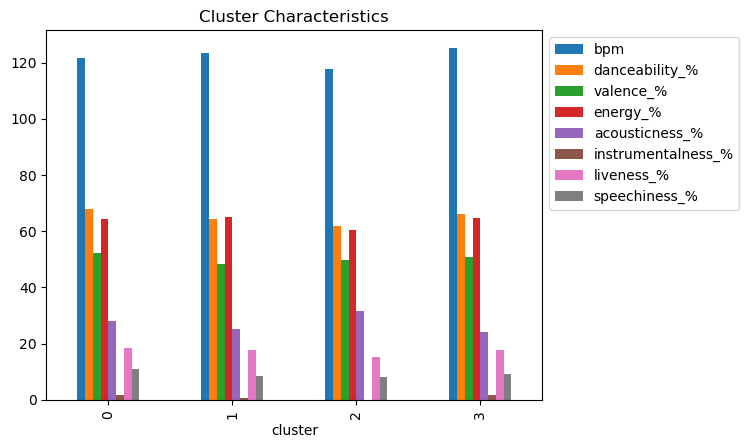

In [60]:
cluster_means.plot(kind='bar')
plt.title('Cluster Characteristics')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()